In [2]:
ROW_DATA_PATH = "China_Acc_Results"
# # Merge different method in all years into one table
# from DataProcess.mergeData import mergeData
# for sub in ["All_children", "All_middle", "All_old", "All_young", "Female", "Male", "Full"]:
#     mergeData(ROW_DATA_PATH, sub)

In [ ]:
# Get data for analysis
import os
import pandas as pd
import geopandas as gpd
from DataProcess.multiFigs import multiFigs
DATA_ROOT = os.path.join(ROW_DATA_PATH, "Result")
GEO_DB = os.path.join("ArcGIS", "ChinaDynam.gdb")
FIG_PATH = os.path.join(".", "paper", "figure")

RESULT = pd.read_csv(os.path.join(DATA_ROOT, "city_optAcc.csv"), encoding="utf-8")
city = pd.read_csv(os.path.join(DATA_ROOT, "city_with_clusting.csv"), encoding="utf-8")
# urban = pd.read_csv(os.path.join(DATA_ROOT, "city_urbanRatio.csv"), encoding="utf-8")
ev = pd.read_excel(os.path.join(DATA_ROOT, "China_2022_EV_ownership.xlsx")).set_index(u"城市")
evcs = gpd.read_file(GEO_DB, layer="Merge_Amap_15_25")
gdp = pd.read_excel(os.path.join(DATA_ROOT, "city_gdponly.xlsx")).set_index(u"区县")

In [3]:
# Cities in China lacking any charging efficiency throughout the entire decade
for y in range(2015, 2026):
    a = set(RESULT[RESULT["Relative_Accessibility_{}".format(y)].isna()]["name"].to_list())
    a = a & a
    print(a)

{'甘南藏族自治州', '白杨市', '信阳市', '遂宁市', '东营市', '安顺市', '临夏回族自治州', '凉山彝族自治州', '运城市', '德宏傣族景颇族自治州', '黄石市', '贺州市', '昌都市', '莆田市', '绥化市', '河池市', '河源市', '太子山天然林保护区', '乐东黎族自治县', '黔西南布依族苗族自治州', '酒泉市', '山南市', '铜仁市', '肇庆市', '汉中市', '锡林郭勒盟', '果洛藏族自治州', '贵阳市', '和田地区', '临沧市', '滁州市', '葫芦岛市', '昆玉市', '黑河市', '荆门市', '新星市', '荆州市', '文昌市', '昌江黎族自治县', '三明市', '伊春市', '来宾市', '防城港市', '黄南藏族自治州', '红河哈尼族彝族自治州', '辽阳市', '克拉玛依市', '南平市', '庆阳市', '玉溪市', '乌海市', '玉树藏族自治州', '巴彦淖尔市', '岳阳市', '怀化市', '万宁市', '张掖市', '衡阳市', '邵阳市', '克孜勒苏柯尔克孜自治州', '揭阳市', '固原市', '咸宁市', '淮北市', '临高县', '大兴安岭地区', '阿拉善盟', '延安市', '迪庆藏族自治州', '赣州市', '宜昌市', '梧州市', '神农架林区', '胡杨河市', '朝阳市', '巴中市', '图木舒克市', '池州市', '金昌市', '孝感市', '南充市', '五指山市', '铁门关市', '丽水市', '铜川市', '曲靖市', '怒江傈僳族自治州', '黄冈市', '澄迈县', '十堰市', '宣城市', '阿坝藏族羌族自治州', '牡丹江市', '伊犁哈萨克自治州', '陇南市', '北屯市', '广安市', '琼中黎族苗族自治县', '通辽市', '阿克苏地区', '阿里地区', '钦州市', '大理白族自治州', '保山市', '茂名市', '屯昌县', '盘锦市', '通化市', '六盘水市', '天门市', '达州市', '琼海市', '百色市', '内江市', '崇左市', '白城市', '定安县', '阜阳市', '毕节市', '抚顺市', '楚雄彝族自治州', '吉林市', '文山壮族苗族自治州', '可克达拉

In [ ]:
# # Generate urban ratio
# from DataProcess.mergeData import calUrbanRatio
# calUrbanRatio((GEO_DB, "CNMap_City_Urban_Rural"), DATA_ROOT)
# # Generate tourist list
# from DataProcess.setting import TOUR_CITY_LIST
# tour = RESULT[["name"]].join(pd.DataFrame({"tour": "Tourist City"}, index= TOUR_CITY_LIST), on="name").fillna({"tour": "Not Tourist City"}).set_index("name")
# tour.to_csv(os.path.join(DATA_ROOT, "city_tour.csv"), encoding="utf-8")

Fig 1

In [ ]:
# Yearly official EVCS data
from DataProcess.drawBasicMap import stackplot
provinceLevelData = pd.read_excel(os.path.join(DATA_ROOT, "provinceLevel", "China_EVCS.xlsx"))
stackplot(provinceLevelData, "Number of chargers (millions)", "Growth rate of chargers (%)", "N", 90, os.path.join(FIG_PATH, "fig1"))

# Relationship between coverage and EVCS
from DataProcess.boxPlot import boxPlot
f = multiFigs(1, 3, figsize="HH", sharex=True, sharey=False)
colName = list(range(2015, 2026))
meanprops = {"markerfacecolor":"lightgreen"}

df = pd.read_excel(os.path.join(DATA_ROOT, "Raster_Density_population.xlsx"))
boxPlot(df, colName, f.axs[0], "Population Coverage", (0, 0.5), xticklabel=colName, color=0, meanprops=meanprops) 
df = pd.read_excel(os.path.join(DATA_ROOT, "Raster_Density_gdp.xlsx"))
boxPlot(df, colName, f.axs[1], "GDP Coverage", (0, 0.5), xticklabel=colName, color=1, meanprops=meanprops)
df = pd.read_excel(os.path.join(DATA_ROOT, "Roads_Density_highway.xlsx"))
boxPlot(df, colName, f.axs[2], "Roads Density", (0, 16), xticklabel=colName, color=2, meanprops=meanprops)

f.globalXlabel("Year", [-1])
f.save(os.path.join(FIG_PATH, "fig1", "basic.jpg"))

Fig 2

In [4]:
# Boxplot of efficiency
from DataProcess.boxPlot import boxPlot
boxPlot(RESULT.copy(), "Relative_Accessibility", ylim=(0.5, 0.8), figsize="SM", path=os.path.join(FIG_PATH, "fig2"))

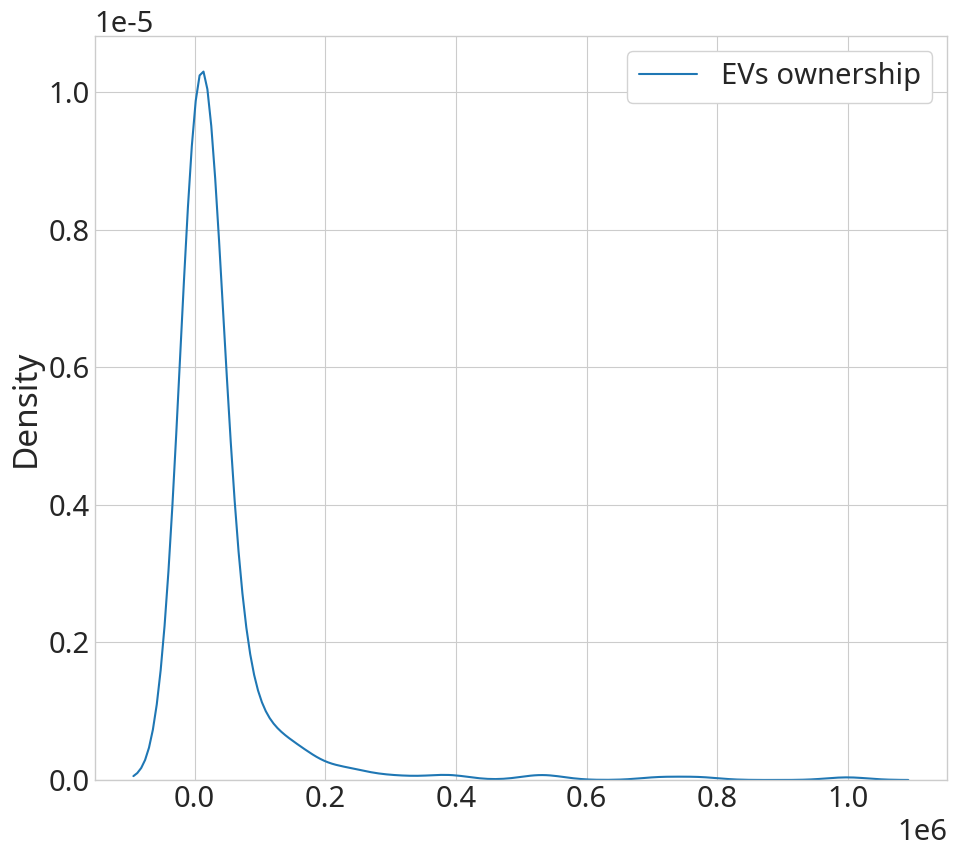

c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\combineAnalysis.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["" if int(x) % 2 ==0 else x for x in years])
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\combineAnalysis.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["" if int(x) % 2 ==0 else x for x in years])


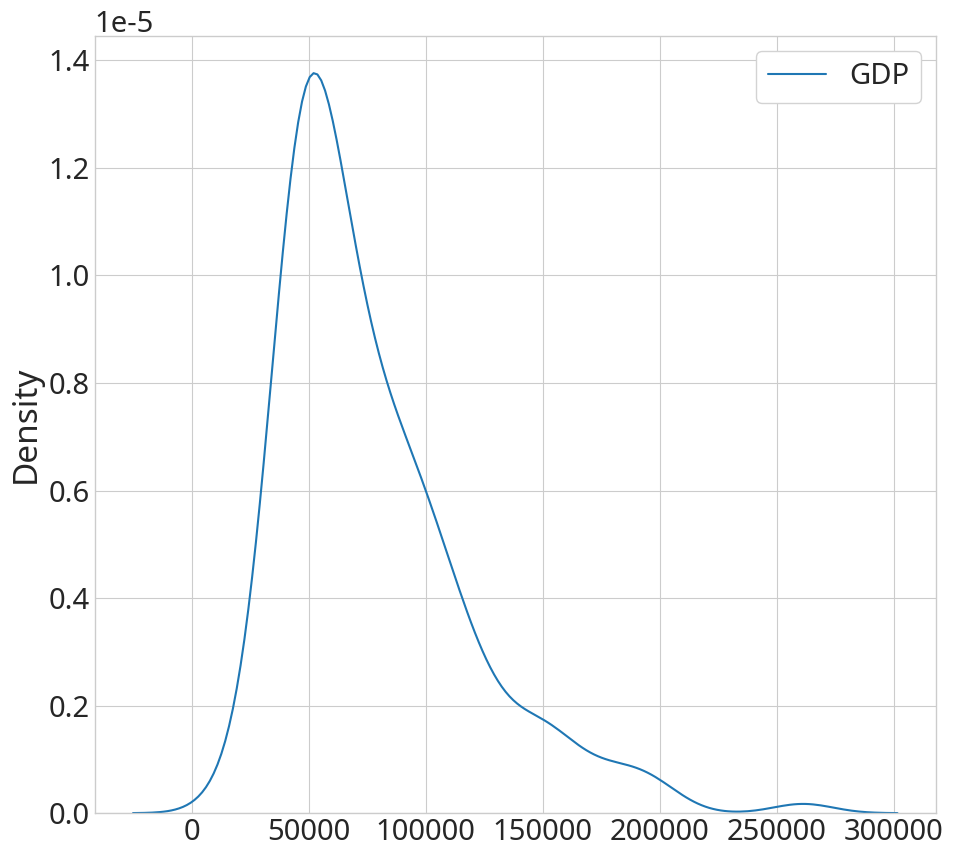

c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\combineAnalysis.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["" if int(x) % 2 ==0 else x for x in years])
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\combineAnalysis.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["" if int(x) % 2 ==0 else x for x in years])


In [ ]:
# Boxplot of other components
from DataProcess.combineAnalysis import combineAnalysis
a = combineAnalysis(RESULT, (ev, u"保有量"))
a.boxPlot("Relative_Accessibility", (0.5, 0.8), figsize="SM", savePath=os.path.join(FIG_PATH, "fig2"))
a.boxPlot("M2SFCA_Gini", (0.5, 1), legLoc="lower left", colorGroup = 1, savePath=os.path.join(FIG_PATH, "fig3")) # Fig 3

b = combineAnalysis(RESULT, (gdp, u"人均GDP(元)"))
b.boxPlot("Relative_Accessibility", (0.5, 0.8), figsize="SM", savePath=os.path.join(FIG_PATH, "fig2"))
b.boxPlot("M2SFCA_Gini", (0.5, 1), legLoc="lower left", colorGroup = 1, savePath=os.path.join(FIG_PATH, "fig3")) # Fig 3

In [ ]:
# Clusting analysis
from DataProcess.clusting import clusting
BASE_MAP = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="CNMap_City", encoding="utf-8")
a = clusting(RESULT.copy(), BASE_MAP.copy())

In [ ]:
a.calMoranI("Relative_Accessibility", 0.5)
a.calMoranI("Gini_efficiency", 0.5)

Relative_Accessibility do not have sptial correaltion.
Gini_efficiency do not have sptial correaltion.


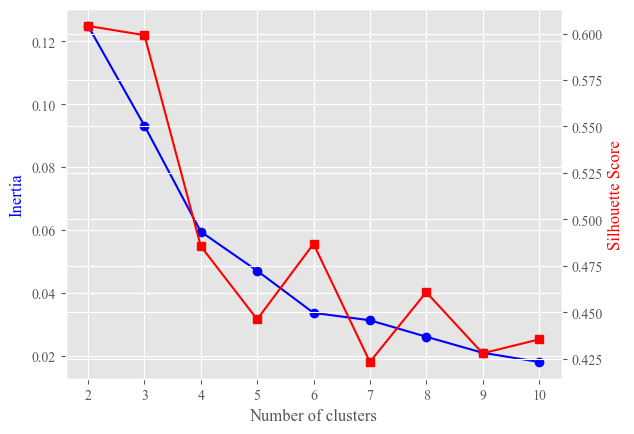

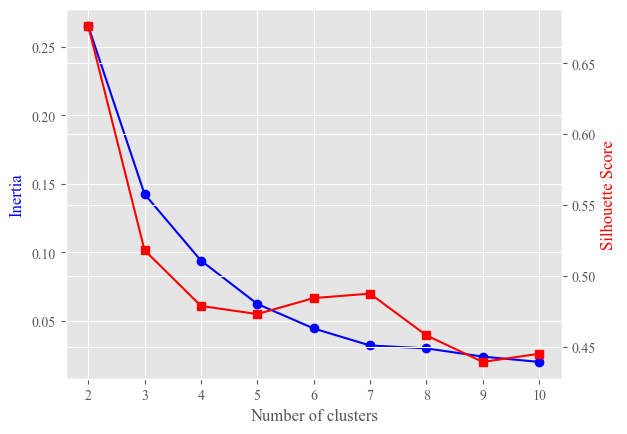

In [6]:
a.showK("Relative_Accessibility")
a.showK("M2SFCA_Gini")

Cluster 0: ['鄂州市', '广安市', '濮阳市', '宣城市', '六盘水市', '深圳市', '三明市', '景德镇市', '楚雄彝族自治州', '大连市', '攀枝花市', '贺州市', '西安市', '淮北市', '石家庄市', '汕尾市', '荆门市', '衢州市', '迪庆藏族自治州', '葫芦岛市', '济南市', '贵阳市', '珠海市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '泉州市', '自贡市', '临沂市', '百色市', '鞍山市', '唐山市', '岳阳市', '河源市', '孝感市', '金华市', '兴安盟', '雅安市', '亳州市', '商洛市', '盐城市', '汕头市', '安顺市', '黔南布依族苗族自治州', '厦门市', '阿克苏地区', '红河哈尼族彝族自治州', '太原市', '常德市', '牡丹江市', '淮南市', '威海市', '绍兴市', '池州市', '淮安市', '黔东南苗族侗族自治州', '莆田市', '南昌市', '佛山市', '昆明市', '张家界市', '泸州市', '沈阳市', '邯郸市', '马鞍山市', '三亚市', '十堰市', '呼和浩特市', '德宏傣族景颇族自治州', '枣庄市', '安阳市', '阳泉市', '保亭黎族苗族自治县', '鹰潭市', '乐东黎族自治县', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '镇江市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '澄迈县', '长沙市', '屯昌县', '定安县', '海口市', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '锡林郭勒盟', '琼中黎族苗族自治县', '长治市', '通化市', '上海市', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '驻马店市', '哈密市', '锦州市', '肇庆市', '恩施土家族苗族自治州', '宜昌市', '平凉市', '青岛市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '广州市', '吉林市', '九江市', '来宾市', '张家口市', '德州市', '抚顺市',

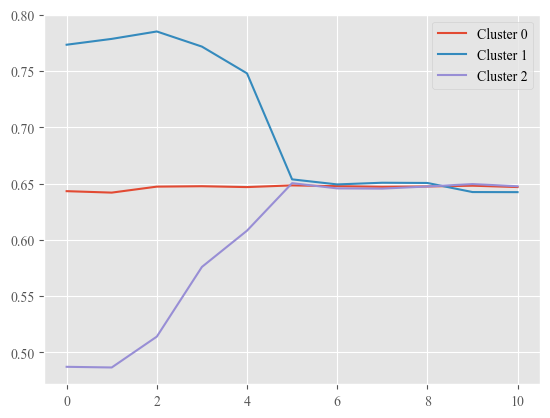

Cluster 0: ['梅州市', '鄂州市', '吕梁市', '舟山市', '朝阳市', '广安市', '濮阳市', '宣城市', '六盘水市', '三明市', '景德镇市', '楚雄彝族自治州', '攀枝花市', '贺州市', '邵阳市', '石家庄市', '荆门市', '衢州市', '迪庆藏族自治州', '宜宾市', '葫芦岛市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '自贡市', '临沂市', '百色市', '鞍山市', '铜陵市', '唐山市', '岳阳市', '河源市', '孝感市', '兴安盟', '盘锦市', '雅安市', '亳州市', '商洛市', '盐城市', '安顺市', '黔南布依族苗族自治州', '阿克苏地区', '红河哈尼族彝族自治州', '甘南藏族自治州', '常德市', '牡丹江市', '淮南市', '德阳市', '威海市', '秦皇岛市', '阳江市', '铁岭市', '达州市', '池州市', '淮安市', '遵义市', '黔东南苗族侗族自治州', '莆田市', '大同市', '张家界市', '泸州市', '邯郸市', '马鞍山市', '日照市', '德宏傣族景颇族自治州', '梧州市', '枣庄市', '安阳市', '怀化市', '阳泉市', '保亭黎族苗族自治县', '中农发山丹马场', '鹰潭市', '博尔塔拉蒙古自治州', '乐东黎族自治县', '辽源市', '齐齐哈尔市', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '镇江市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '吐鲁番市', '澄迈县', '屯昌县', '定安县', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '娄底市', '长治市', '赣州市', '通化市', '巴音郭楞蒙古自治州', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '黑河市', '扬州市', '驻马店市', '株洲市', '锦州市', '恩施土家族苗族自治州', '怒江傈僳族自治州', '平凉市', '眉山市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '吉林市', '九江市', '漳

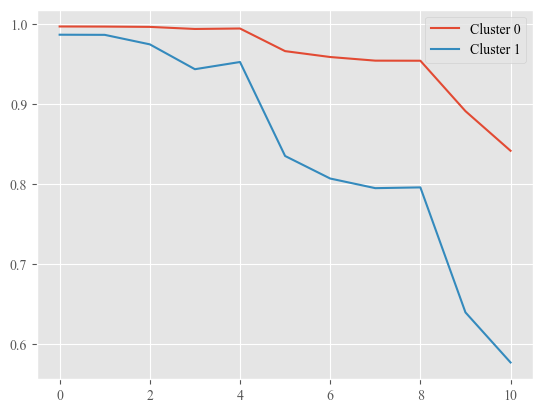

In [7]:
reativeClustering = a.clusting("Relative_Accessibility", 3)
giniClustering = a.clusting("M2SFCA_Gini", 2)

Stable efficiency & Slowly increased equlity (215): {'宿州市', '遂宁市', '东营市', '信阳市', '安顺市', '泰州市', '临夏回族自治州', '许昌市', '凉山彝族自治州', '运城市', '德宏傣族景颇族自治州', '拉萨市', '贺州市', '昌都市', '咸阳市', '莆田市', '菏泽市', '绥化市', '河池市', '河源市', '海南藏族自治州', '乐东黎族自治县', '黔西南布依族苗族自治州', '酒泉市', '山南市', '枣庄市', '邯郸市', '晋中市', '昌吉回族自治州', '随州市', '和田地区', '临沧市', '滁州市', '葫芦岛市', '长治市', '鄂州市', '荆门市', '兴安盟', '延边朝鲜族自治州', '新星市', '中卫市', '滨州市', '荆州市', '文昌市', '昌江黎族自治县', '三明市', '洛阳市', '来宾市', '三门峡市', '黄南藏族自治州', '红河哈尼族彝族自治州', '辽阳市', '南平市', '庆阳市', '玉溪市', '襄阳市', '乌海市', '巴彦淖尔市', '岳阳市', '塔城地区', '平凉市', '万宁市', '张掖市', '衡阳市', '七台河市', '濮阳市', '淮南市', '咸宁市', '临沂市', '临高县', '大兴安岭地区', '马鞍山市', '九江市', '鹰潭市', '上饶市', '迪庆藏族自治州', '唐山市', '威海市', '神农架林区', '巴中市', '聊城市', '衢州市', '台州市', '池州市', '金昌市', '孝感市', '南充市', '镇江市', '连云港市', '宿迁市', '驻马店市', '亳州市', '忻州市', '盐城市', '丽水市', '常德市', '宜春市', '泰安市', '仙桃市', '济源市', '曲靖市', '宝鸡市', '萍乡市', '黄冈市', '商丘市', '阳泉市', '澄迈县', '宣城市', '潍坊市', '牡丹江市', '重庆市', '陇南市', '焦作市', '嘉峪关市', '广安市', '周口市', '日喀则市', '龙岩市', '西宁市', '喀什地区', '通辽市', '张家口市', '阿克苏地区', '阿里地区

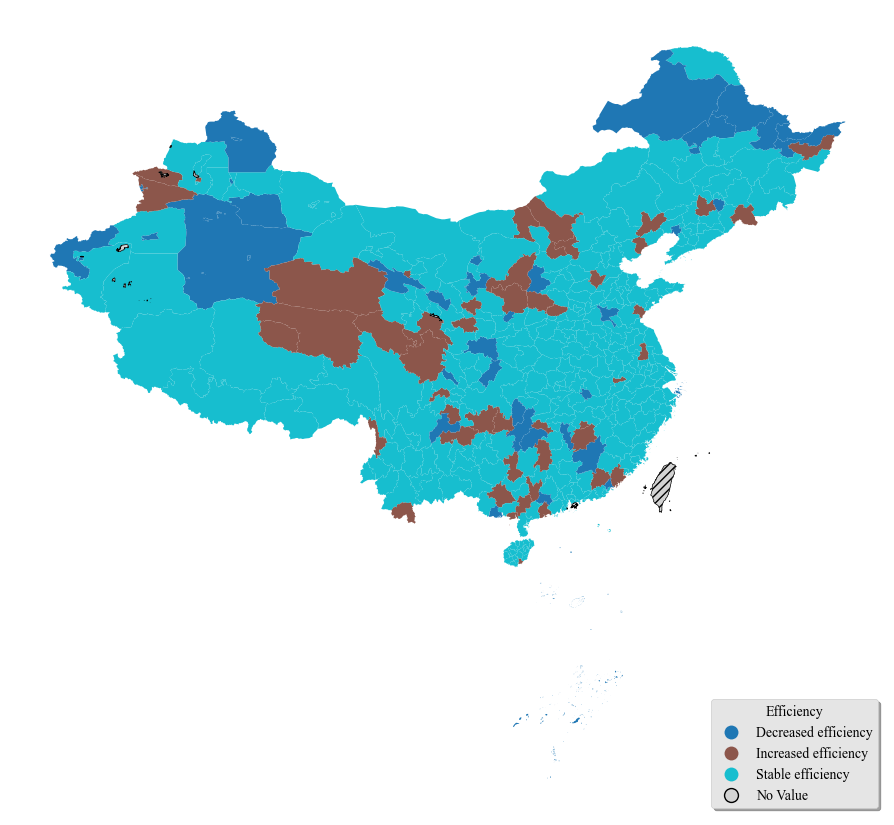

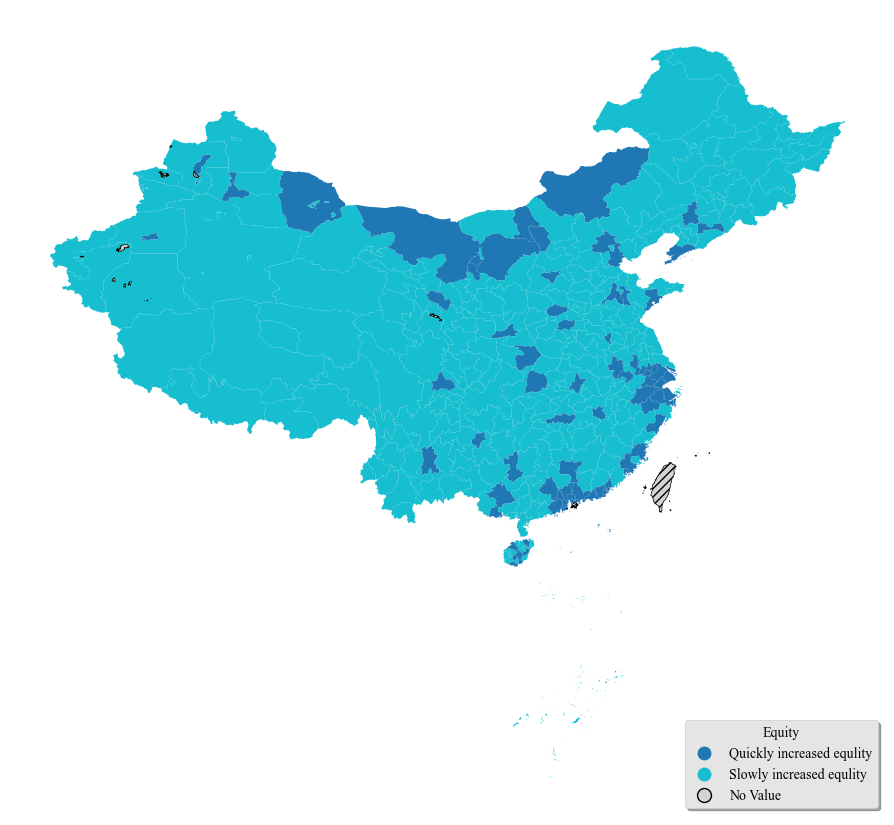

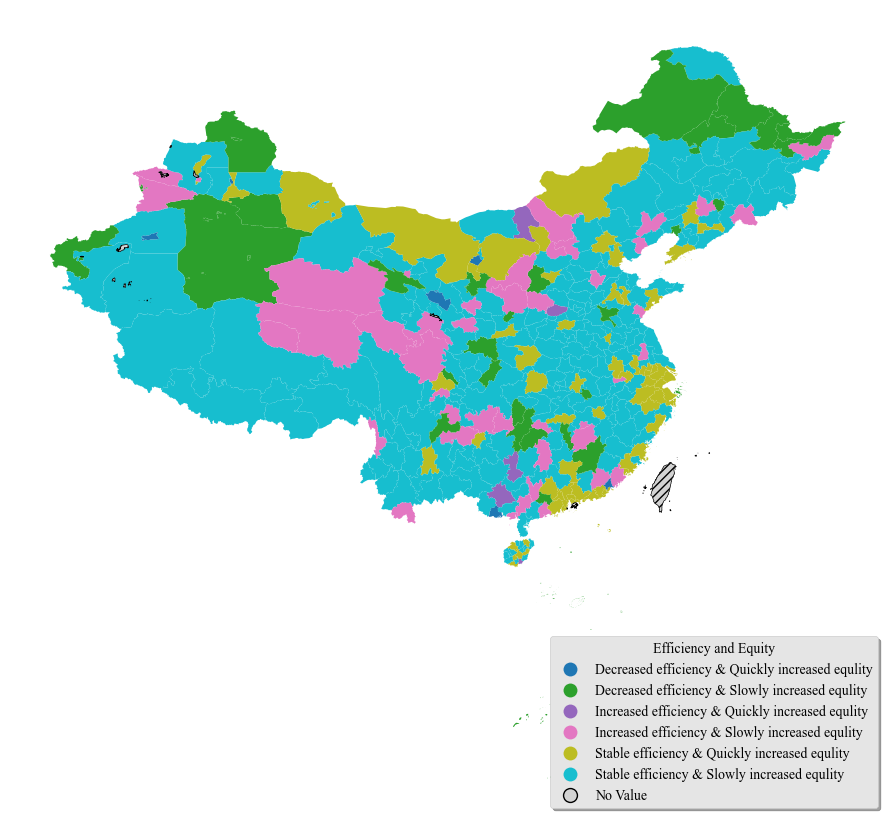

In [ ]:
from DataProcess.drawBasicMap import drawClusting
BASE_MAP = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="CNMap_City", encoding="utf-8")
drawClusting(RESULT, BASE_MAP, reativeClustering, giniClustering, "China_Acc_Results\\Result")

In [ ]:
# Draw clusting results
from DataProcess.clustingAnalysis import clustingAnalysis
clustingResult = pd.read_csv("China_Acc_Results\\Result\\city_with_clusting.csv", encoding="utf-8")
b = clustingAnalysis(clustingResult, gdp, path=os.path.join(FIG_PATH, "fig2")).analysisEfficiency()
b.analysis()
b.drawClusting(figsize="SHH")


=== Economic index of Decreased Opt-Acc ===
• Average GDP 1464.41 (Stander Division: 1296.10)
• Average Per Capita GDP 70301.71
• Industrial Structue: Primary Industry 18.08% | Secondary Industru 37.07% | Tertiary Industry 44.85%

=== Economic index of Increased Opt-Acc ===
• Average GDP 2036.08 (Stander Division: 1748.88)
• Average Per Capita GDP 70474.37
• Industrial Structue: Primary Industry 15.62% | Secondary Industru 37.25% | Tertiary Industry 47.13%

=== Economic index of Stable Opt-Acc ===
• Average GDP 3961.55 (Stander Division: 6092.86)
• Average Per Capita GDP 79467.01
• Industrial Structue: Primary Industry 13.23% | Secondary Industru 37.27% | Tertiary Industry 49.49%


c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\clustingAnalysis.py:359: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([None] + ["" if int(x) % 2 ==0 else x for x in years] + [None]) # type: ignore
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\clustingAnalysis.py:359: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([None] + ["" if int(x) % 2 ==0 else x for x in years] + [None]) # type: ignore
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\clustingAnalysis.py:359: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set

Fig 3

In [6]:
# Boxplot of efficiency
from DataProcess.boxPlot import boxPlot
boxPlot(RESULT.copy(), "M2SFCA_Gini", colorGroup = 1, ylim=(0.5, 1), path=os.path.join(FIG_PATH, "fig3"))

In [ ]:
# First deployed chort
from DataProcess.cohort import cohort
cohort(RESULT, "M2SFCA_Gini", [-1], os.path.join(FIG_PATH, "fig3"))

In [ ]:
# Draw clusting results
from DataProcess.clustingAnalysis import clustingAnalysis
clustingResult = pd.read_csv("China_Acc_Results\\Result\\city_with_clusting.csv", encoding="utf-8")
b = clustingAnalysis(clustingResult, gdp, colorGroup=1, path=os.path.join(FIG_PATH, "fig3")).analysisEquity()
b.analysis()
b.drawClusting(figsize="SD")

Fig 4

In [ ]:
from DataProcess.populationAnalysis import populationAnalysis
from DataProcess.multiFigs import multiFigs
f = multiFigs(1, 3, figsize="H3W", sharex=True, sharey=False)
x = ["city_optAcc_Female.csv", "city_optAcc_Male.csv"]
n = "Gender"

a = populationAnalysis(pd.DataFrame(), os.path.join("China_Acc_Results", "Result"), x, n)
a.difference("M2SFCA_Accessibility", "gender", ax=f.axs[0])

x = ["city_optAcc_All_middle.csv", "city_optAcc_All_old.csv", "city_optAcc_All_young.csv"] # "city_efficiency_All_children.csv" No need for children
n = "Age"
b = populationAnalysis(pd.DataFrame(), os.path.join("China_Acc_Results", "Result"), x, n)
b.difference("M2SFCA_Accessibility", "age", adj=1, ax=f.axs[1:])

f.globalYlabel("Accessibility Gap", [1])
f.save(os.path.join(FIG_PATH, "fig4", "fig4.jpg"))

c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\populationAnalysis.py:185: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df2], ignore_index=True)
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\populationAnalysis.py:273: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(years)
c:\Users\tengd\OneDrive - The Hong Kong Polytechnic University\Student Assistant\ChinaDynam\DataProcess\populationAnalysis.py:185: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a futur